**[Refference](https://kite.com/blog/python/data-analysis-visualization-python#detailed_explanation_of_EDA)**: 

## Introduce 

There is so much data in today’s world. Modern businesses and academics alike collect vast amounts of data on myriad processes and phenomena. 
=> New data analysis and visualization programs allow for reaching even deeper understanding.

Data analytics allow businesses to understand their efficiency and performance, and ultimately helps the business make more informed decisions. 
For example, an e-commerce company might be interested in analyzing customer attributes in order to display targeted ads for improving sales. 


## Defining Exploratory Data Analysis

**Exploratory Data Analysis** – EDA – plays a critical role in understanding the what, why, and how of the problem statement.It’s first in the order of operations that a data analyst will perform when handed a new data source and problem statement.

Exploratory Data Analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

Different operations where EDA comes into play:
* First and foremost, EDA provides a stage for breaking down problem statements into smaller experiments which can help understand the dataset
* EDA provides relevant insights which help analysts make key business decisions
* The EDA step provides a platform to run all thought experiments and ultimately guides us towards making a critical decision

## Overview

Introduces key components of Exploratory Data Analysis along with a few examples to get you started on analyzing your own data. 

We’ll cover a few relevant theoretical explanations, as well as use sample code as an example so ultimately, you can apply these techniques to your own data set.

The main objective of the introductory article is to cover how to:
* Read and examine a dataset and classify variables by their type: quantitative vs. categorical
* Handle categorical variables with numerically coded values
* Perform univariate and bivariate analysis and derive meaningful insights about the dataset
* Identify and treat missing values and remove dataset outliers
* Build a correlation matrix to identify relevant variables

Above all, we’ll learn about the important API's of the python packages that will help us perform various EDA techniques.


## A detailed explanation of an EDA on sales data

We’ll look into some code and learn to interpret key insights from the different operations that we perform.
Our requirements include the [pandas](https://kite.com/python/docs/pandas), [numpy](https://kite.com/python/docs/numpy), [seaborn](https://kite.com/python/docs/seaborn), and [matplotlib](https://kite.com/python/docs/matplotlib) python packages.
[python](https://kite.com/blog/python/)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

For reading data and performing EDA operations, we’ll primarily use the numpy and pandas Python packages, which offer simple API's that allow us to plug our data sources and perform our desired operation.
For the output, we’ll be using the Seaborn package which is a Python-based data visualization library built on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Data visualization is an important part of analysis since it allows even non-programmers to be able to decipher trends and patterns.

Kaggle is a great community of data scientists analyzing data together – it’s a great place to find data to practice the skills.

We’ll be analyzing a [Kaggle data set](https://www.kaggle.com/flenderson/sales-analysis) on a company’s sales and inventory patterns.
The dataset contains **a detailed set of products in an inventory** and the **main problem statement here is to determine the products that should continue to sell, and which products to remove from the inventory.**
The file contains the **observations of both historical sales and active inventory data.** The end solution here is to create **a model that will predict which products to keep and which to remove from the inventory** – we’ll **perform EDA on this data to understand the data better**. 


**[a companion Kaggle notepad](https://www.kaggle.com/dvigneshwer/kernele7f4dbb964)**

## Quick peek at functions: an example

Let’s analyze the dataset and take a closer look at its content. The aim here is to find details like the number of columns and other metadata which will help us to gauge size and other properties such as the range of values in the columns of the dataset.

In [2]:
sales_data = pd.read_csv("../input/SalesKaggle3.csv")
sales_data.head()

# similarly we can see the bottom rows of the Pandas dataframe with the command sales_data.tail().

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


*Types of variables and descriptive statistics*

Once we have loaded the dataset into the Python environment, our next step is understanding what these columns actually contain with respect to the range of values, learn which ones are categorical in nature etc.

To get a little more context about the data it’s necessary to understand what the columns mean with respect to the context of the business – this helps establish rules for the potential transformations that can be applied to the column values.

Here are the definitions for a few of the columns:
* **File_Type**: The value “Active" means that the particular product needs investigation
* **SoldFlag**: The value 1 = sale, 0 = no sale in past six months
* **SKU_number**: This is the unique identifier for each product.
* **Order**: Just a sequential counter. Can be ignored.
* **SoldFlag**: 1 = sold in past 6 mos. 0 = Not sold
* **MarketingType**: Two categories of how we market the product.
* **New_Release_Flag**: Any product that has had a future release (i.e., Release Number > 1)

In [3]:
sales_data.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


The describe function returns a pandas series type that provides descriptive statistics which summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

The **three main numerical measures** for the center of a distribution are the **mode, mean(µ), and the median (M)**.

The mode is **the most frequently occurring value**.

The **mean is the average value**, while **the median is the middle value**.

When we call the describe function with include=’all’ argument it displays the descriptive statistics for all the columns, which includes the categorical columns as well.

In [4]:
sales_data.describe(include='all')

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,75996.000000,75996.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.171009,0.322306,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.376519,1.168615,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


Next, **we address some of the fundamental questions**:


In [5]:
# The number of entries in the dataset:

sales_data.shape

(198917, 14)

In [6]:
# Total number of products & unique values of the columns:
# nunique() would return the number of unique elements in each column

sales_data.nunique()

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64

In [7]:
# Count of the historical and active state, (we need only analyze the active state products):

sales_data[sales_data.File_Type=='Historical']['SKU_number'].count()

75996

In [9]:
sales_data[sales_data.File_Type=='Active']['SKU_number'].count()

122921

we have 122921 active cases which needs to be analyzed. We then Split the dataset into two parts based on the flag type. To do this, we must pass the required condition in square brackets to the sales_data object, which examines all the entries with the condition mentioned and creates a new object with only the required values.

In [10]:
sales_data_hist = sales_data[sales_data.File_Type=='Historical']
sales_data_act = sales_data[sales_data.File_Type=='Active']

**To summarize all the operations so far:**

The dataset contains 198,917 rows and 14 columns with 12 numerical and 2 categorical columns. There are 122,921 actively sold products in the dataset, which is where we’ll focus our analysis.

## Univariate and bivariate analysis

The data associated with each attribute includes a long list of values (both numeric and not), and having these values as a long series is not particularly useful yet – they don’t provide any standalone insight. In order to convert the raw data into information we can actually use, we need to summarize and then examine **the variable’s distribution**.

The univariate distribution plots are graphs where we plot the histograms along with the estimated probability density function over the data. It’s one of the simplest techniques where we consider a single variable and observe its spread and statical properties. 

The univariate analysis for numerical and categorical attributes are different.

For categorical columns we plot histograms, we use the **value_count()** and **plot.bar()** functions to draw a bar plot, which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values.

The bar plot shows comparisons among these discrete categories, with the x-axis showing the specific categories and the y-axis the measured value.

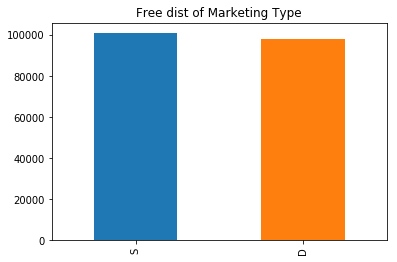

In [13]:
sales_data.MarketingType.value_counts().plot.bar(title='Free dist of Marketing Type')

Similarly, by changing the column name in the code above, we can analyze every categorical column.


Below is the code to plot the univariate distribution of the numerical columns which contains the histograms and the estimated PDF. We use **displot of the seaborn library** to plot this graph:

/home/duanle/vendor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


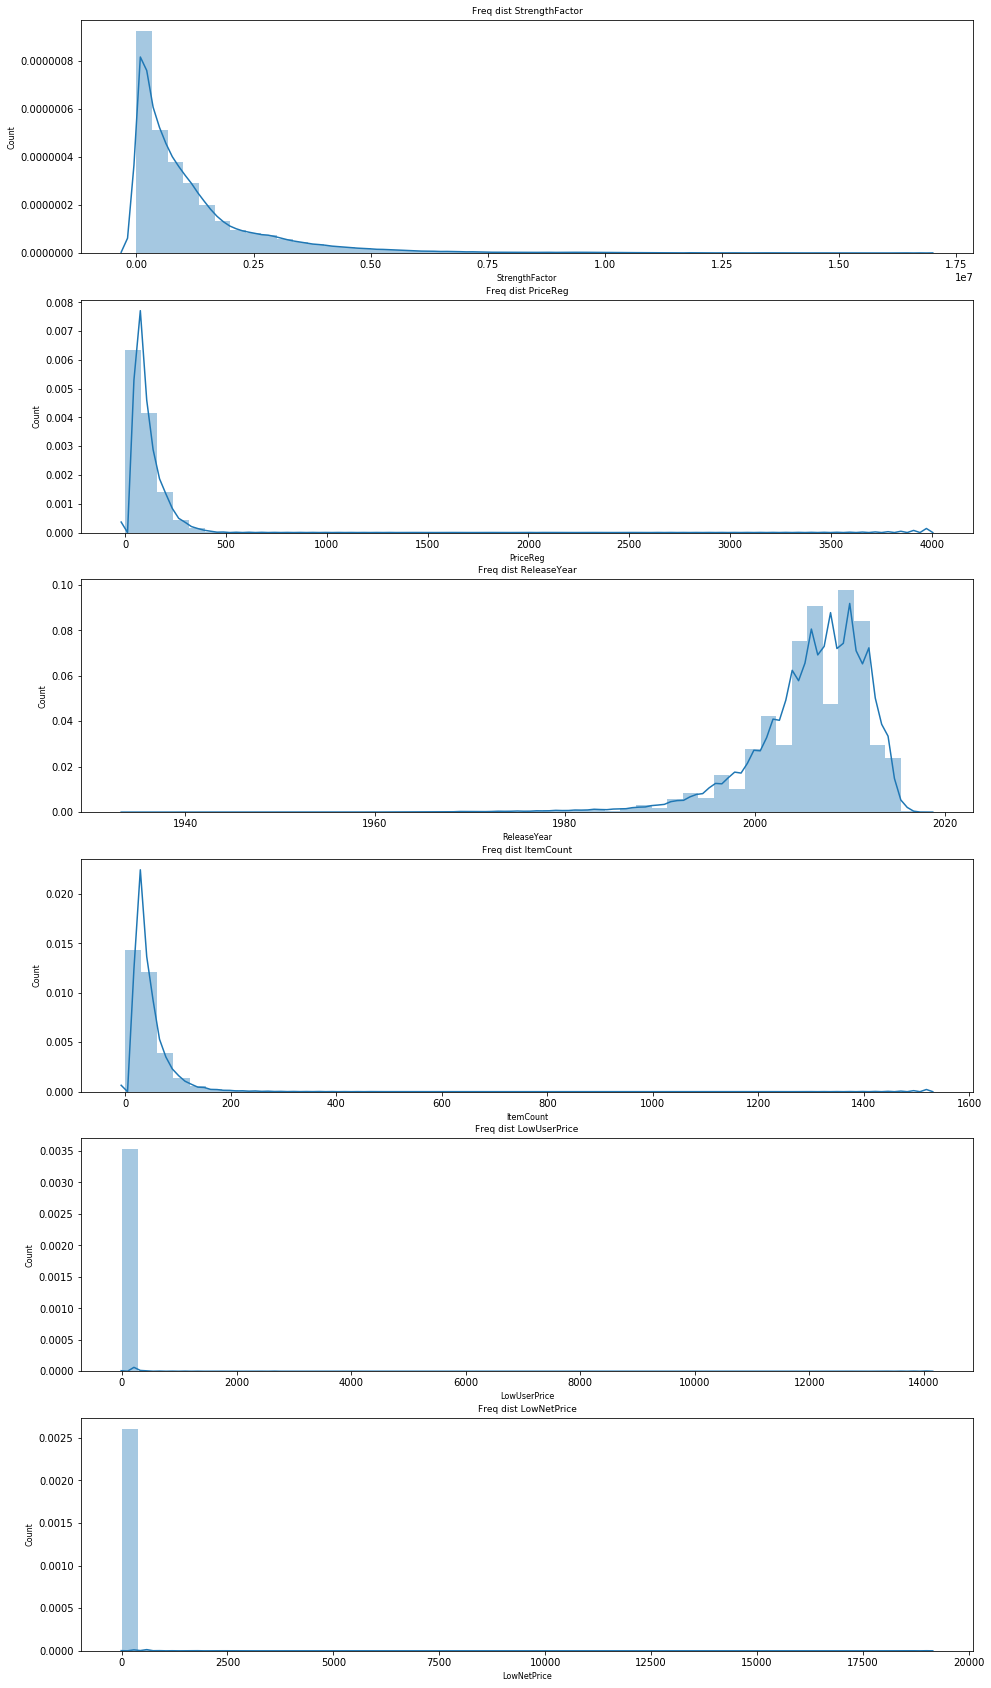

In [18]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig,ax = plt.subplots(nrows=len(col_names), figsize=(16,30))

for i, col_val in enumerate(col_names):
    sns.distplot(sales_data_hist[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+ col_val, fontsize=9)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

We can see that leaving the ReleaseYear column every other column is skewed to the left which indicates most of the values lie in the lower range values and vice versa in the case of a ReleaseYear attribute.

The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot, and we use the **pairplot() function of the seaborn package** to plot the bivariate distributions:


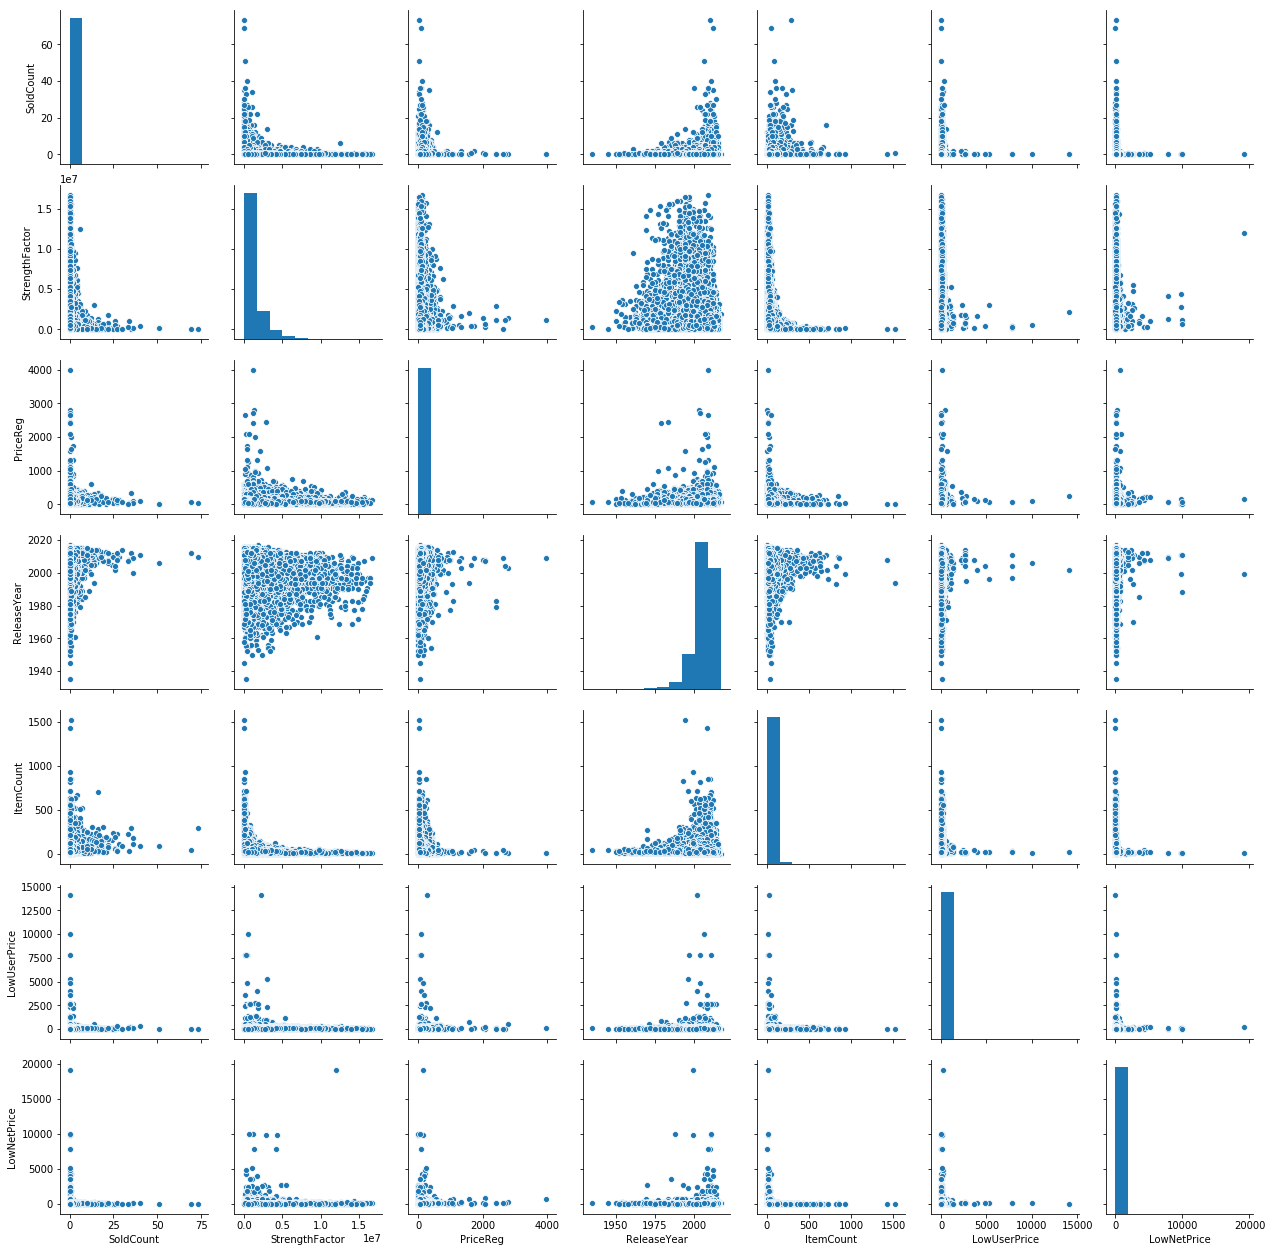

In [19]:
sales_data_hist = sales_data_hist.drop([
    'Order', 'File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'
], axis=1)

sns.pairplot(sales_data_hist)

We often look out for scatter plots that follow a clear linear pattern with an either increasing or decreasing slope so that we can draw conclusions, but don’t notice these patterns in this particular dataset. That said, there’s always room to derive other insights that might be useful by comparing the nature of the plots between the variables of interest.

## Missing value analysis

Missing values in the dataset refer to those fields which are empty or no values assigned to them, these usually occur due to data entry errors, faults that occur with data collection processes and often while joining multiple columns from different tables we find a condition which leads to missing values. 

There are numerous ways with which missing values are treated the easiest ones are to replace the missing value with the mean, median, mode or a constant value (we come to a value based on the domain knowledge) and another alternative is to remove the entry from the dataset itself.

### To check if there are any null values in the dataset

``` python
data_frame.isnull().values.any()
```

If the above snippet returns true then there are null values in the dataset and false means there are none

``` python
data_frame.isnull().sum()
```

The above snippet returns the total number of missing values across different columns

Now in order to replace the missing values, we use the fillna function of pandas to replace na values with the value of our interest and inplace=True command makes the permanently changes the value in that dataframe.

```python
data_frame['col_name'].fillna($, inplace=True)
```


## Outlier detection analysis

An outlier might indicate a **mistake in the data** (like a typo, or a measuring error, seasonal effects etc), in which case it should be corrected or removed from the data before calculating summary statistics or deriving insights from the data, failing to which will lead to incorrect analysis.

Below is the code to plot the box plot of all the column names mentioned in the list **col_names**.
The box plot allows us to visually analyze the outliers in the dataset.

**The key terminology to note here are as follows:**

* The range of the data provides us with a measure of spread and is equal to a value between the smallest data point (min) and the largest one (Max)
* The interquartile range (IQR), which is the range covered by the middle 50% of the data.
* IQR = Q3 - Q1, the difference between the third and first quartiles. The first quartile (Q1) is the value such that one quarter (25%) of the data points fall below it, or the median of the bottom half of the data. The third quartile is the value such that three quarters (75%) of the data points fall below it, or the median of the top half of the data.
* The IQR can be used to detect outliers using the 1.5(IQR) criteria. Outliers are observations that fall below Q1 - 1.5(IQR) or above Q3 + 1.5(IQR).

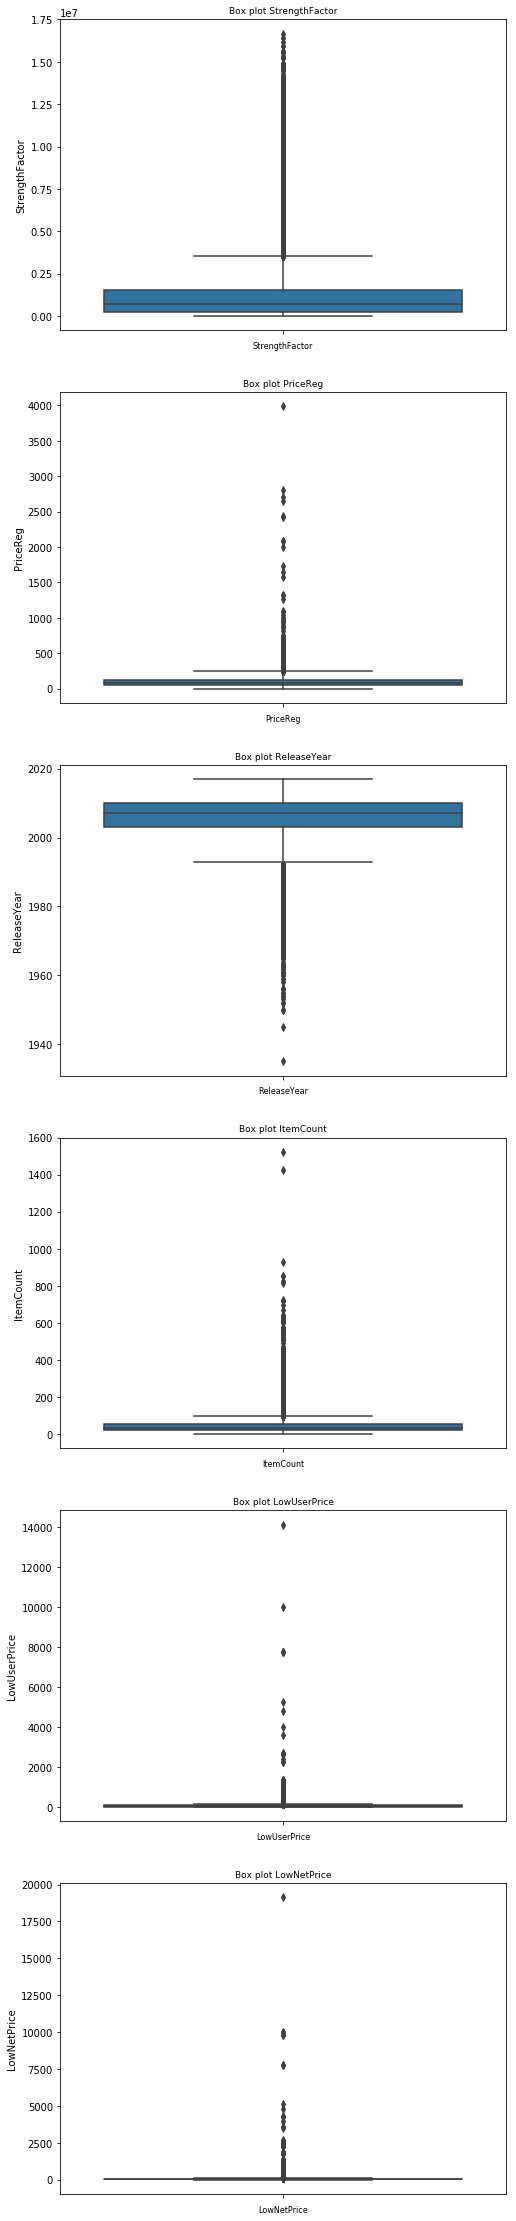

In [21]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names),figsize=(8,40))

for i, col_name in enumerate(col_names):
    sns.boxplot(y=sales_data_hist[col_name], ax=ax[i])
    ax[i].set_title('Box plot {}'.format(col_name), fontsize=9)
    ax[i].set_xlabel(col_name, fontsize=8)
    
plt.show()

Based on the above definition of how we identify outliers the black dots are outliers in the strength factor attribute and the red colored box is the IQR range.

## Percentile based outlier removal

One of the most popularly used technique is the Percentile based outlier removal, where we filter out outliers based on fixed percentile values.
The other techniques in this category include removal based on z-score, constant values etc.

In [22]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold)/2
    minval, maxval = np.percentile(data, [diff, 100-diff])
    return (data < minval) | (data > maxval)

/home/duanle/vendor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


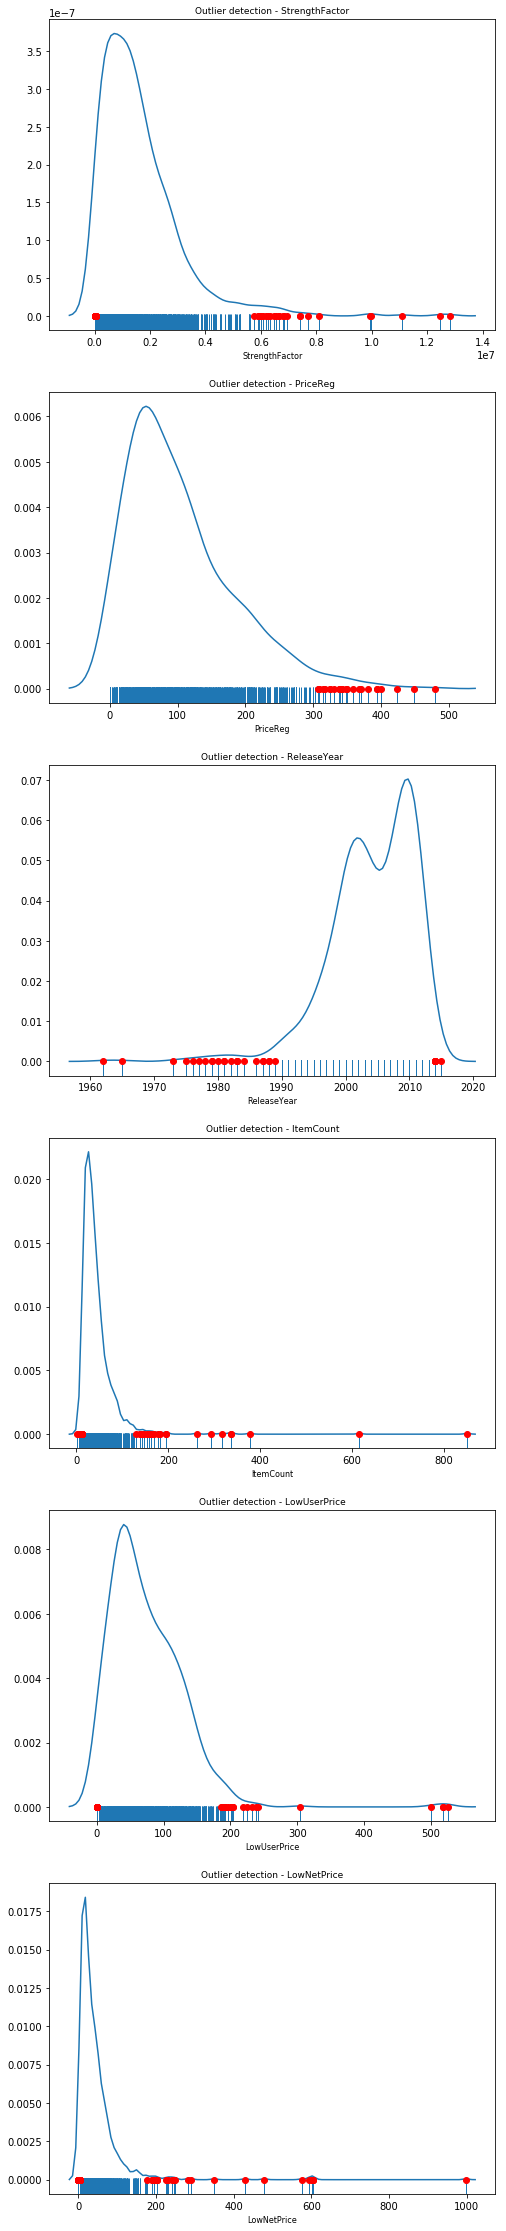

In [24]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8, 40))

for i, col_name in enumerate(col_names):
    x = sales_data_hist[col_name][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    
    ax[i].set_title("Outlier detection - {}".format(col_name), fontsize=9)
    ax[i].set_xlabel(col_name, fontsize=8)
    
plt.show()

The values marked with a dot below in the x-axis of the graph are the ones that are removed from the column based on the set threshold percentile (95 in our case), and is also the default value when it comes to percentile-based outlier removal.

## The correlation matrix

A correlation matrix is a table showing the value of the correlation coefficient ([Correlation coefficients]() are used in statistics to measure how strong a relationship is between two variables. ) between sets of variables. 

Each attribute of the dataset is compared with the other attributes to find out the correlation coefficient. 

This analysis allows you to see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance of the dataset thus we can further analyze them to understand which attribute among the pairs are most significant for building the model.

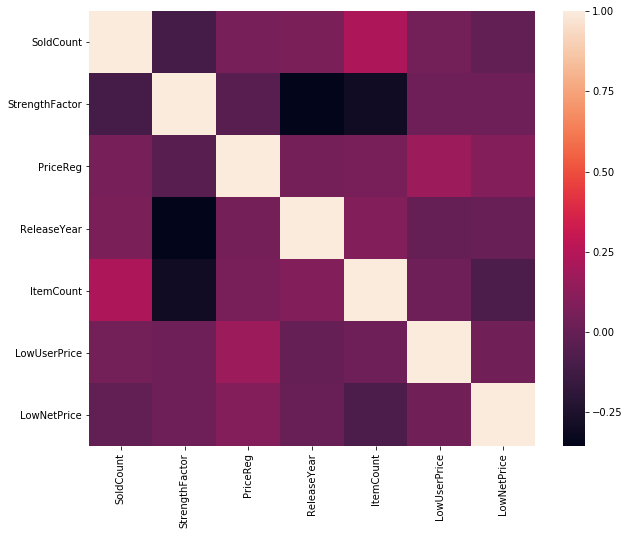

In [25]:
fig, ax = plt.subplots(figsize=(10,8))

corr = sales_data_hist.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Above you can see the correlation network of all the variables selected, correlation value lies between -1 to +1.
    
In this dataset, we don’t see any attributes to be correlated and the diagonal elements of the matrix value are always 1 as we are finding the correlation between the same columns thus the inference here is that **all the numerical attributes are important and needs to be considered for building the model**.

## Conclusions

Ultimately, there’s no limit to the number of experiments one can perform in the EDA process – it completely depends on what you’re analyzing, as well as the knowledge of packages such as Pandas and matplotlib our job becomes easier.

The code from our example is also available [here](https://www.kaggle.com/dvigneshwer/kernele7f4dbb964). 

If you’re interested in expanding your EDA toolkit even further, you may want to look into more advanced techniques such as advance missing value treatments that use regression-based techniques, or even consider exploring multivariate factor and cluster analysis.

These techniques are usually used when there are many attributes to analyze, and many of them represent the same information, often containing hundreds of variables – depending on the domain. Usually for model building, we consider 30-40 odd variables, in which case performing more advanced techniques is necessary to come up with factor variables that better represent the variance in the dataset.